# Pré-traitement des images

In [7]:
def letter_border(image):
    (x_lenght, y_lenght) = image.shape
    x_min = x_lenght
    x_max = 0
    y_min = y_lenght
    y_max = 0
    for i in range(x_lenght):
        for j in range(y_lenght):
            if image[i,j]!=0:
                if i < x_min:
                    x_min = i
                if i > x_max:
                    x_max = i
                if j < y_min:
                    y_min = j
                if j > y_max:
                    y_max = j
    return (x_lenght,y_lenght,x_min,x_max,y_min,y_max)

In [8]:
def barycentre(image):
    x_lenght,y_lenght,x_min,x_max,y_min,y_max = letter_border(image)
    x_pos, y_pos = [], []
    for i in range(x_lenght):
        for j in range(y_lenght):
            if image[i,j]!=0:
                x_pos.append(i)
                y_pos.append(j)
    aire = len(x_pos)
    M10 = sum(x_pos)
    M01 = sum(y_pos)
    bary = [int(M10/aire),int(M01/aire)]

    dist_bary_x = max(abs(x_min-bary[0]),abs(x_max-bary[0]))
    dist_bary_y = max(abs(y_min-bary[1]),abs(y_max-bary[1]))
    
    return (bary,dist_bary_x,dist_bary_y)

In [18]:
def resize_1(image):
    x_lenght,y_lenght,x_min,x_max,y_min,y_max = letter_border(image)
    x_min_border = x_min - 5
    x_max_border = x_max + 5
    y_max_border = y_max + 5
    y_min_border = y_min - 5
    image = image[x_min_border:x_max_border,y_min_border:y_max_border]

In [15]:
def resize_2(image):
    bary,dist_bary_x,dist_bary_y = barycentre(image)
    x_min_border = bary[0]-dist_bary_x - 5
    x_max_border = bary[0]+dist_bary_x + 5
    y_max_border = bary[1]+dist_bary_y + 5
    y_min_border = bary[1]-dist_bary_y - 5
    image = image[x_min_border:x_max_border,y_min_border:y_max_border]

In [24]:
def resize_3(image):
    bary,dist_bary_x,dist_bary_y = barycentre(image)
    margin = max(dist_bary_x,dist_bary_y) + 5
    x_min_border = bary[0]- margin
    x_max_border = bary[0]+ margin
    y_max_border = bary[1]+ margin
    y_min_border = bary[1]- margin
    return image[x_min_border:x_max_border,y_min_border:y_max_border]

Redimensionnement des images

In [4]:
import imageio
letter_array =['B','C','D','E','F','G','H','I','J','K'];
for letter in range(0,10):
    for i in range(1,251):
        image_file_name = 'data/' + letter_array[letter] + str(i) + '.bmp'
        image = imageio.imread(image_file_name)
        imageio.imwrite('data_resized/'+letter_array[letter] + str(i) + '.bmp', resize_3(image), format='bmp')
        with open('data_resized/'+letter_array[letter] + str(i) + '.bmp', 'r+b') as f:
            with Image.open(f) as image:
                cover = resizeimage.resize_cover(image, [12, 12])
                cover.save('data_resized/'+letter_array[letter] + str(i) + '.bmp', image.format)

NameError: name 'resize_3' is not defined

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


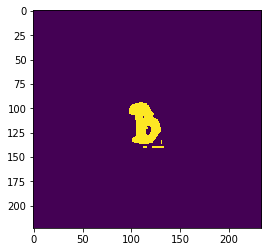

In [5]:


import matplotlib.pyplot as plt
import matplotlib.image as mpimg
image_file_name = 'data/B201.bmp'
image = imageio.imread(image_file_name)
print(image)
img=mpimg.imread('data/B201.bmp')
imgplot2 = plt.imshow(img)
plt.show()